---
title: "여러개의 ROC-Curves를 하나의 plot 안에 그리는 방법"
description: "여러 모델의 AUC를 비교하기 위한 최고의 방법"
date: "2022-01-19"
freeze: true
categories: [ML]
---

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Load a toy Dataset from sklearn

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()

X = data.data
y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.25,
                                                   random_state=43)

# Training multiple classifiers and recording the results

이 장에서는 몇번의 단계를 실행하게 됩니다:
1. 분류기를 인스턴스화하고 목록을 생성
2. 결과 테이블을 DataFrame으로 정의
3. 모델 훈련 및 결과 기록

우리가 훈련 세트에서 모델을 훈련하고 테스트 세트에서 확률을 예측할겁니다. 확률을 예측한 후 거짓 긍정 비율(FPR), 참 긍정 비율(TPR) 및 AUC 점수를 계산합니다.

In [3]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot the figure

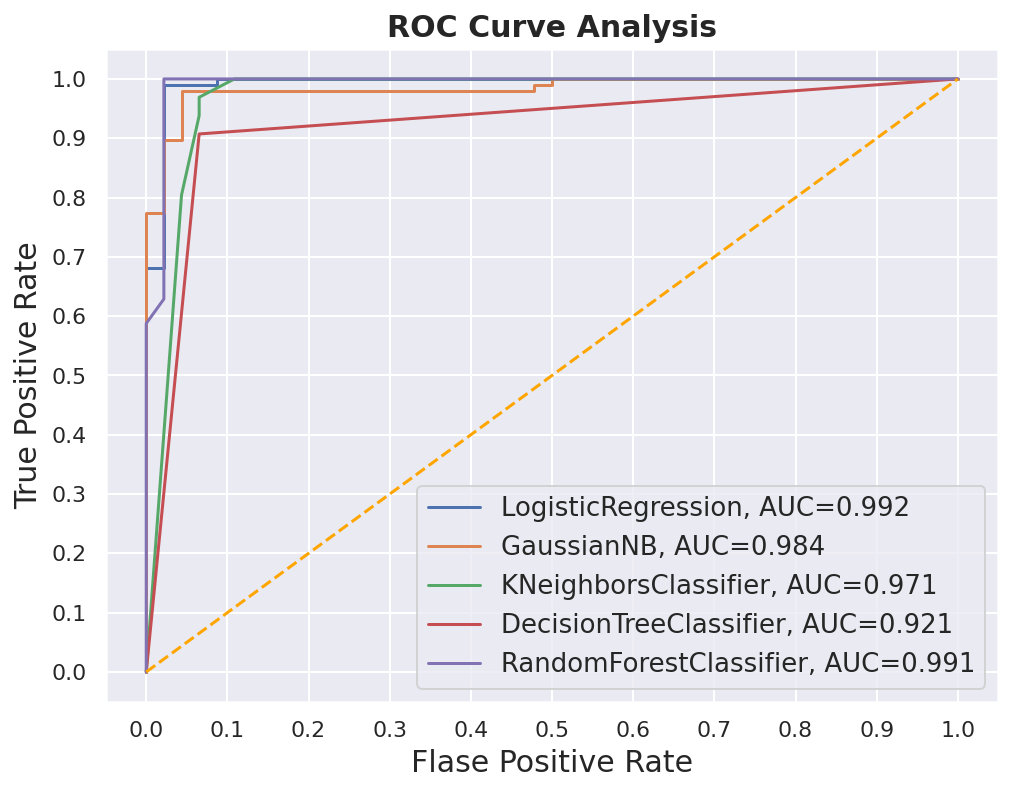

In [4]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

아래의 코드를 이용해서 figure를 저장할 수 있습니다.

In [5]:
fig.savefig('multiple_roc_curve.png')